In [465]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [466]:
observations = pd.read_csv(r"C:\Users\DannyP\Desktop\Python 2023\Code Acad Guides\biodiversity-starter\biodiversity_starter\observations.csv")
species_info = pd.read_csv(r"C:\Users\DannyP\Desktop\Python 2023\Code Acad Guides\biodiversity-starter\biodiversity_starter\species_info.csv")

In [467]:
observations

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


In [468]:
species_info

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


# Cleaning Data

## Cleaning `observations` file
As we can see in the line below, we have duplicates when we drop the "observations" column.

Counting the observations in different rows isn't ideal, so we want to sum up each unique name/park sightings to one row.

ex: Holcus lanatus sightings in Bryce National Park are counted in 3 different rows with observation values of 83, 117 and 96. we want to sum up these and save this in just one row


In [469]:
observations.drop("observations", axis = 1).duplicated().value_counts()

False    22164
True      1132
dtype: int64

In [470]:
observations[observations["scientific_name"].str.contains("Holcus lanatus")]

,scientific_name,park_name,observations
3510,Holcus lanatus,Yellowstone National Park,262
4786,Holcus lanatus,Yosemite National Park,146
6237,Holcus lanatus,Bryce National Park,83
6277,Holcus lanatus,Yosemite National Park,179
8335,Holcus lanatus,Yosemite National Park,138
8405,Holcus lanatus,Bryce National Park,117
8561,Holcus lanatus,Bryce National Park,96
15812,Holcus lanatus,Great Smoky Mountains National Park,65
15829,Holcus lanatus,Yellowstone National Park,256
19218,Holcus lanatus,Great Smoky Mountains National Park,77


In [471]:
#below sums up rows that were duplicate scientific_name and park_name columns that were using an independent count into one row, one count.
observations["total_obs"] = observations.groupby(["scientific_name", "park_name"])["observations"].transform("sum")
observations.drop("observations", axis = 1, inplace = True)
observations.drop_duplicates(inplace=True)
observations.reset_index(drop = True, inplace = True)

Now that is is done we can see that we dont have duplicates. Number of False above matches False below

In [472]:
observations.drop("total_obs", axis=1).duplicated().value_counts()

False    22164
dtype: int64

In [473]:
observations[observations["scientific_name"].str.contains("Holcus lanatus")]

,scientific_name,park_name,total_obs
3479,Holcus lanatus,Yellowstone National Park,805
4739,Holcus lanatus,Yosemite National Park,463
6155,Holcus lanatus,Bryce National Park,296
15272,Holcus lanatus,Great Smoky Mountains National Park,216


In [474]:
observations

,scientific_name,park_name,total_obs
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
22159,Croton monanthogynus,Yosemite National Park,173
22160,Otospermophilus beecheyi,Bryce National Park,130
22161,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
22162,Dicranella rufescens,Yosemite National Park,171


## --------------------------------------------------------------------------------------

## Cleaning `species_info` file

All it seems we need to do is fill the blank columns in "conservation_status"

In [475]:
species_info.fillna("No Intervention", inplace=True)
species_info

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention
1,Mammal,Bos bison,"American Bison, Bison",No Intervention
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,No Intervention
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",No Intervention
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",No Intervention
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",No Intervention


## Merging the data

We'll merge the data left then check if there was any issues like blank cells/unexpected rows etc

In [476]:
obs_spec = pd.merge(observations,species_info,on = "scientific_name", how = "left" )

We have 23296 rows (same as total len of observations) and we dont have any blank cells. Looks good

In [477]:
print(len(obs_spec))
obs_spec.isna().any().any()

23296


False

# Analysis

In [478]:
obs_spec

,scientific_name,park_name,total_obs,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No Intervention
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,No Intervention
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,No Intervention
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,No Intervention
...,...,...,...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173,Vascular Plant,Prairie Tea,No Intervention
23292,Otospermophilus beecheyi,Bryce National Park,130,Mammal,California Ground Squirrel,No Intervention
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140,Vascular Plant,Sessileflower False Goldenaster,No Intervention
23294,Dicranella rufescens,Yosemite National Park,171,Nonvascular Plant,Dicranella Moss,No Intervention


----------------------------

## Does conservation status correlate with total observations?

In [479]:
status_by_mean_obs = obs_spec.groupby("conservation_status")["total_obs"].mean().sort_values().reset_index()
status_by_mean_obs

,conservation_status,total_obs
0,Endangered,54.890625
1,Threatened,83.475000
2,In Recovery,131.687500
3,Species of Concern,145.903727
4,No Intervention,157.213119


Below we can see that it does seem like the more danger the species is in, the less average observations are recorded.

Text(0.5, 1.0, 'Average Observations by Conservation Status')

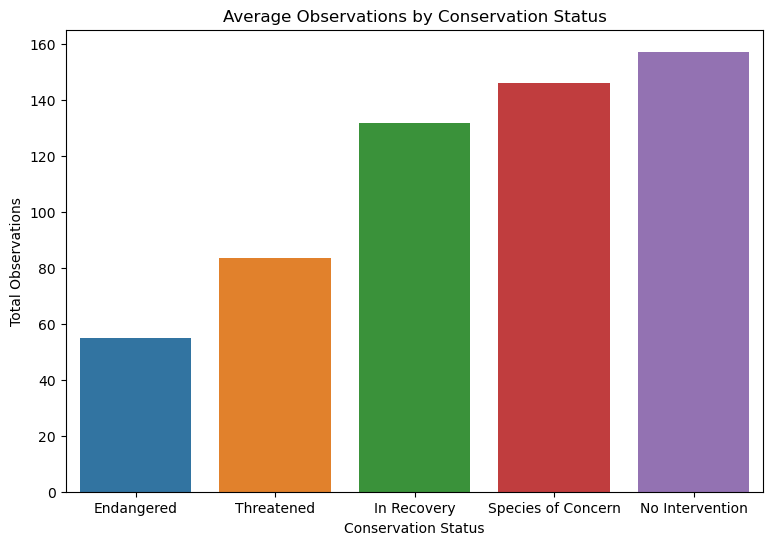

In [480]:
sns.barplot(data = status_by_mean_obs, x = "conservation_status", y = "total_obs", figure=plt.figure(figsize=(9, 6)))
plt.ylabel("Total Observations")
plt.xlabel("Conservation Status")
plt.title("Average Observations by Conservation Status")

-----------------------------------------

## What species(category) is most likely to be in any status other than "No Intervention"?

In [481]:
#Below removes park_name, total_obs and the index, removes duplicates and all rows that == No Intervention. Second line groups the results
obs_spec_wo_ni = obs_spec[obs_spec["conservation_status"] != "No Intervention"].drop(["park_name", "total_obs"], axis=1).reset_index(drop=True).drop_duplicates()
obs_spec_wo_ni.groupby(["conservation_status","category"])["scientific_name"].count().unstack()

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


In [482]:
obs_spec["protected"] = obs_spec["conservation_status"] != "No Intervention"
no_intervention_table = obs_spec.groupby(["category","protected"])["scientific_name"].count().reset_index()\
                .pivot(columns = "protected", index="category", values="scientific_name").reset_index()
no_intervention_table.columns = ["category", "not_protected", "protected"]
no_intervention_table

,category,not_protected,protected
0,Amphibian,292,28
1,Bird,1768,316
2,Fish,464,44
3,Mammal,704,152
4,Nonvascular Plant,1312,20
5,Reptile,296,20
6,Vascular Plant,17696,184


Mammals have the highest rate of species in danger.

In [483]:
no_intervention_table["Percent"] = no_intervention_table["protected"] / no_intervention_table["not_protected"]
no_intervention_table

,category,not_protected,protected,Percent
0,Amphibian,292,28,0.095890
1,Bird,1768,316,0.178733
2,Fish,464,44,0.094828
3,Mammal,704,152,0.215909
4,Nonvascular Plant,1312,20,0.015244
5,Reptile,296,20,0.067568
6,Vascular Plant,17696,184,0.010398


--------------------------------

## How many fox sightings occured in each park?

In [484]:
obs_spec["fox"] = obs_spec["common_names"].str.contains(r"\bFox\b", regex= True) & obs_spec["category"].str.contains("Mammal")
obs_spec[obs_spec.fox].head(5)

,scientific_name,park_name,total_obs,category,common_names,conservation_status,protected,fox
2547,Vulpes fulva,Great Smoky Mountains National Park,66,Mammal,"Black Fox, Cross Fox, Red Fox, Silver Fox",No Intervention,False,True
3889,Vulpes vulpes necator,Bryce National Park,109,Mammal,Sierra Nevada Red Fox,No Intervention,False,True
5499,Urocyon cinereoargenteus,Great Smoky Mountains National Park,162,Mammal,"Common Gray Fox, Gray Fox",No Intervention,False,True
5500,Urocyon cinereoargenteus,Great Smoky Mountains National Park,162,Mammal,Gray Fox,No Intervention,False,True
6282,Urocyon cinereoargenteus,Yosemite National Park,336,Mammal,"Common Gray Fox, Gray Fox",No Intervention,False,True


In [486]:
obs_spec[obs_spec.fox].groupby("park_name")["total_obs"].sum().sort_values(ascending=False).reset_index()


,park_name,total_obs
0,Yellowstone National Park,1941
1,Yosemite National Park,1224
2,Bryce National Park,893
3,Great Smoky Mountains National Park,630
